# OASIS INFOBYTE INTERNSHIP

# TASK 3 - CAR PRICE PRIDICTION WITH MACHINE LEARNING

# by KESHVI CHHATRALA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('car data.csv')

In [5]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [6]:
df.shape

(301, 9)

In [7]:
df.sample(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
127,Bajaj Avenger 150,2016,0.75,0.80,7000,Petrol,Individual,Manual,0
42,sx4,2008,1.95,7.15,58000,Petrol,Dealer,Manual,0
31,ritz,2011,2.35,4.89,54200,Petrol,Dealer,Manual,0
112,KTM 390 Duke,2014,1.15,2.40,7000,Petrol,Individual,Manual,0
208,i20,2017,7.90,8.10,3435,Petrol,Dealer,Manual,0


In [8]:
df[df.duplicated()]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [11]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [13]:
df.corr()['Selling_Price']

Year             0.236141
Selling_Price    1.000000
Present_Price    0.878914
Driven_kms       0.029187
Owner           -0.088344
Name: Selling_Price, dtype: float64

In [14]:
df.sample(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
124,Royal Enfield Classic 500,2012,0.95,1.750,11500,Petrol,Individual,Manual,0
46,ritz,2013,2.65,4.890,64532,Petrol,Dealer,Manual,0
101,UM Renegade Mojave,2017,1.70,1.820,1400,Petrol,Individual,Manual,0
146,Hero Extreme,2014,0.55,0.787,15000,Petrol,Individual,Manual,0
93,fortuner,2015,23.00,30.610,40000,Diesel,Dealer,Automatic,0


# Data Cleaning

In [16]:
df['Company Name']  = df['Car_Name'].apply(lambda x : x.split()[0])

In [17]:
df.drop('Car_Name',axis = 1, inplace= True)

In [18]:
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Company Name
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,ritz
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,sx4
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,ciaz
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,wagon
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,swift


In [19]:
df['Company Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon', 'swift', 'vitara', 's', 'alto',
       'ertiga', 'dzire', 'ignis', '800', 'baleno', 'omni', 'fortuner',
       'innova', 'corolla', 'etios', 'camry', 'land', 'Royal', 'UM',
       'KTM', 'Bajaj', 'Hyosung', 'Mahindra', 'Honda', 'Yamaha', 'TVS',
       'Hero', 'Activa', 'Suzuki', 'i20', 'grand', 'i10', 'eon', 'xcent',
       'elantra', 'creta', 'verna', 'city', 'brio', 'amaze', 'jazz'],
      dtype=object)

In [20]:
def replace(error,correct):
    df['Company Name'] = df['Company Name'].replace(to_replace=error,value=correct)

In [21]:
replace('maxda','mazda')
replace('porcshce','porsche')
replace('Nissan','nissan')
replace('vw','volkswagen')
replace('vokswagen','volkswagen')
replace('toyouta','toyota')

In [22]:
df['Company Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon', 'swift', 'vitara', 's', 'alto',
       'ertiga', 'dzire', 'ignis', '800', 'baleno', 'omni', 'fortuner',
       'innova', 'corolla', 'etios', 'camry', 'land', 'Royal', 'UM',
       'KTM', 'Bajaj', 'Hyosung', 'Mahindra', 'Honda', 'Yamaha', 'TVS',
       'Hero', 'Activa', 'Suzuki', 'i20', 'grand', 'i10', 'eon', 'xcent',
       'elantra', 'creta', 'verna', 'city', 'brio', 'amaze', 'jazz'],
      dtype=object)

In [23]:
df.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type',
       'Selling_type', 'Transmission', 'Owner', 'Company Name'],
      dtype='object')

In [24]:
df.sample(5)

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Company Name
73,2011,2.65,5.71,43000,Petrol,Dealer,Manual,0,etios
42,2008,1.95,7.15,58000,Petrol,Dealer,Manual,0,sx4
197,2010,0.16,0.51,33000,Petrol,Individual,Manual,0,Honda
83,2015,12.50,13.46,38000,Diesel,Dealer,Manual,0,innova
268,2017,4.80,5.80,19000,Petrol,Dealer,Manual,0,brio


# **Data visualization**

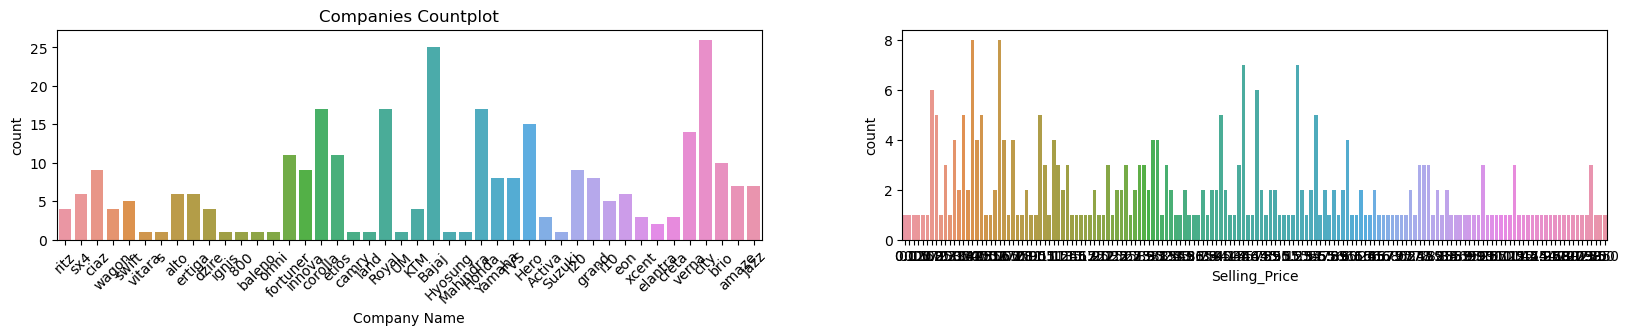

In [27]:
plt.figure(figsize=(20, 6))

plt.subplot(2,2,1)
plt1 = sns.countplot(x='Company Name',data = df)
plt.title('Companies Countplot')
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 45)
plt.subplot(2,2,2)
plt2 = sns.countplot(x='Selling_Price',data = df)

<AxesSubplot:xlabel='Selling_Price'>

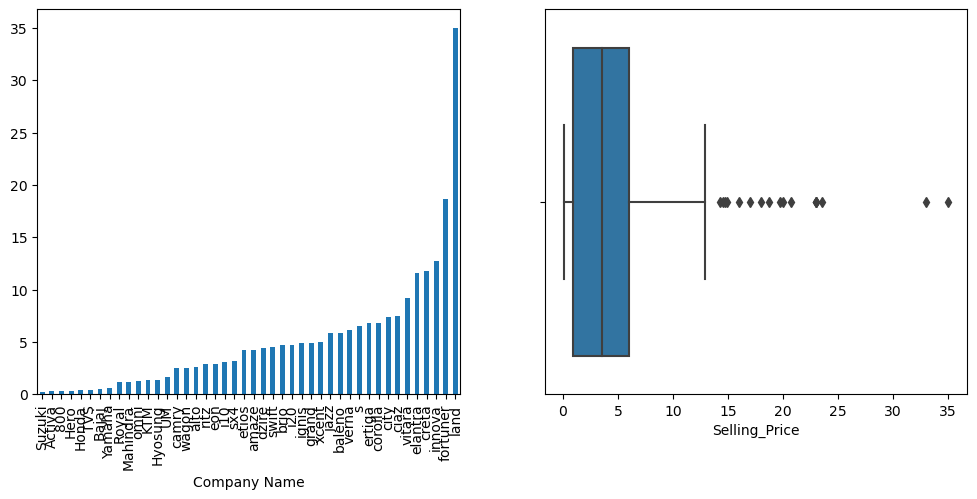

In [30]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
df.groupby('Company Name').mean()['Selling_Price'].sort_values().plot(kind = 'bar')

plt.subplot(1,2,2)
sns.boxplot(x='Selling_Price',data = df)

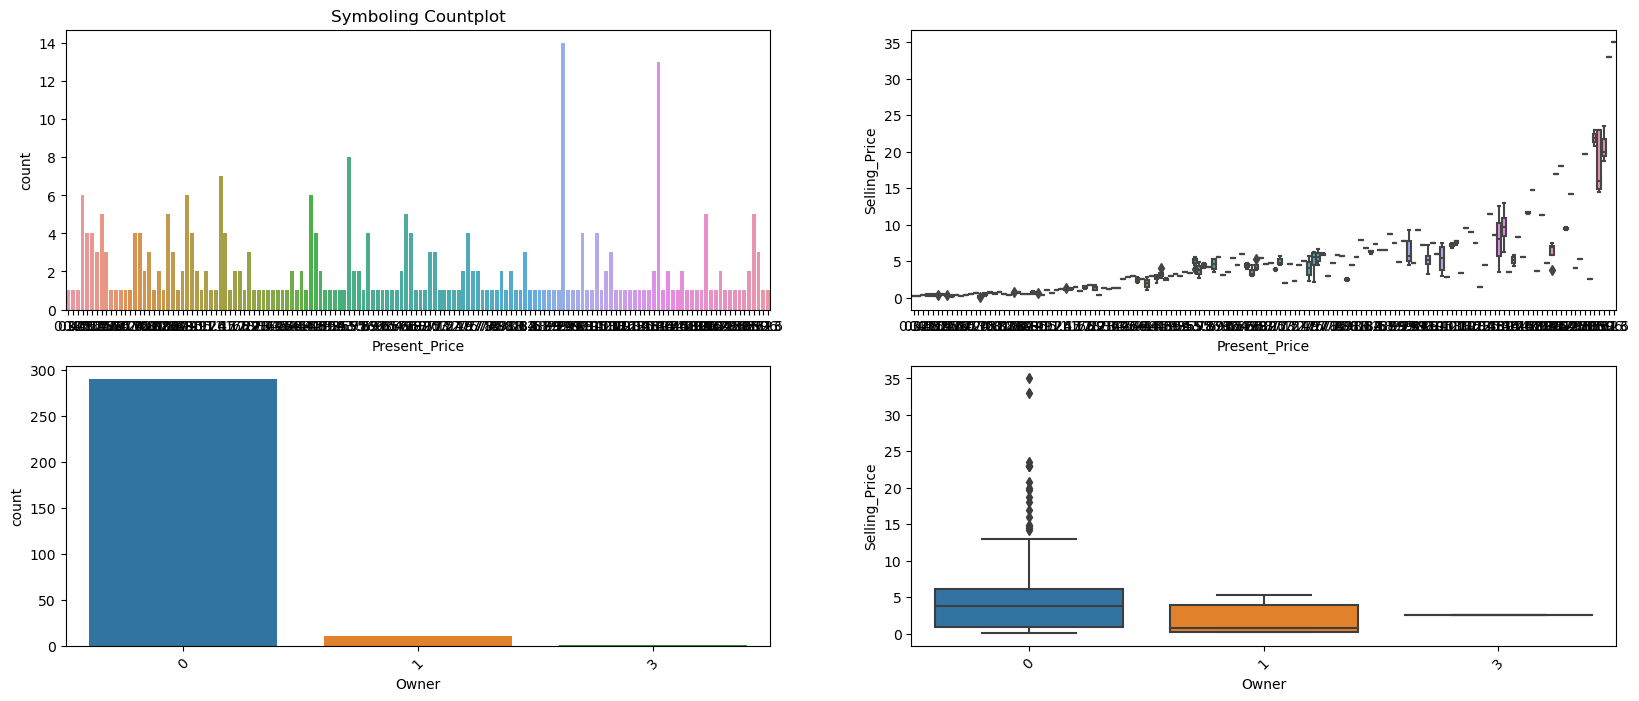

In [34]:
plt.figure(figsize=(20, 8))

plt.subplot(2,2,1)
sns.countplot(x='Present_Price',data = df)
plt.title('Symboling Countplot')

plt.subplot(2,2,3)
sns.countplot(x='Owner',data = df)
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 45)

plt.subplot(2,2,2)
plt1 = sns.boxplot(x='Present_Price',y='Selling_Price',data = df)

plt.subplot(2,2,4)
plt2 = sns.boxplot(x='Owner',y='Selling_Price',data = df)
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 45)

<AxesSubplot:xlabel='Company Name', ylabel='Selling_Price'>

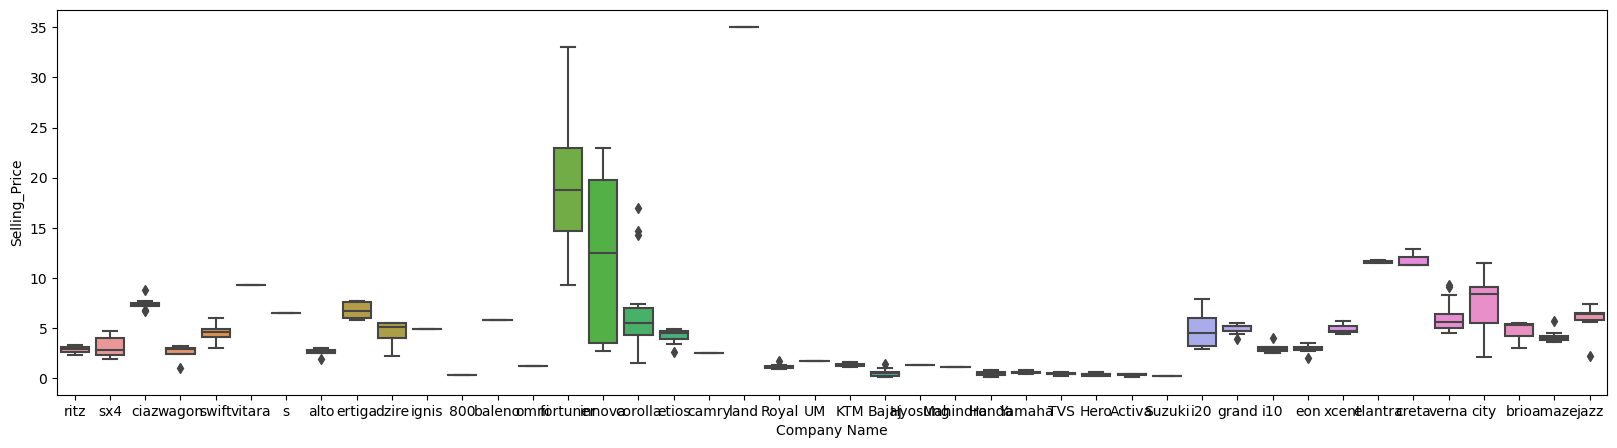

In [36]:
plt.figure(figsize = (20,5))
sns.boxplot(x='Company Name',y = 'Selling_Price',data = df)

In [37]:
df['Selling_Price'].describe()

count    301.000000
mean       4.661296
std        5.082812
min        0.100000
25%        0.900000
50%        3.600000
75%        6.000000
max       35.000000
Name: Selling_Price, dtype: float64

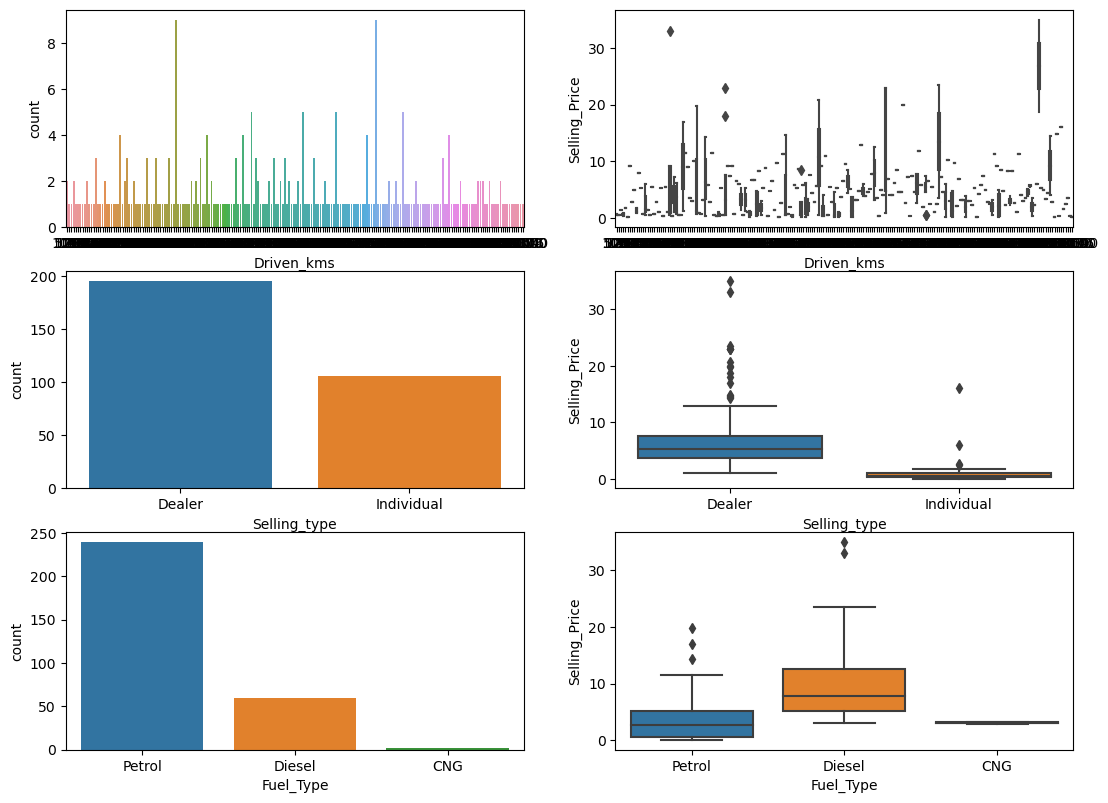

In [38]:
plt.figure(figsize=(13, 13))

plt.subplot(4,2,1)
sns.countplot(x='Driven_kms',data = df)
plt.subplot(4,2,2)
sns.boxplot(x='Driven_kms',y='Selling_Price',data = df)
plt.subplot(4,2,3)
sns.countplot(x='Selling_type',data = df)

plt.subplot(4,2,4)
sns.boxplot(x='Selling_type',y='Selling_Price',data = df)

plt.subplot(4,2,5)
sns.countplot(x='Fuel_Type',data = df)
plt.subplot(4,2,6)
plt1 = sns.boxplot(x='Fuel_Type',y='Selling_Price',data = df)

<AxesSubplot:xlabel='Present_Price', ylabel='Selling_Price'>

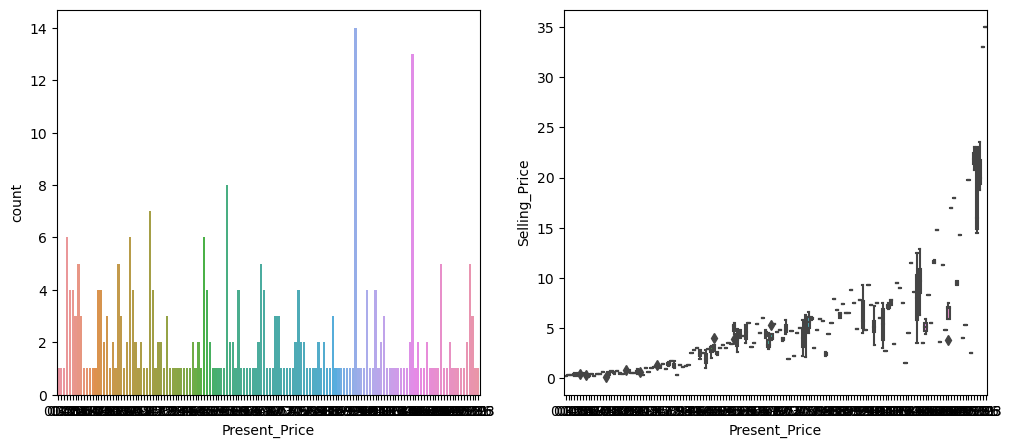

In [39]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.countplot(x='Present_Price',data = df)
plt.subplot(1,2,2)
sns.boxplot(x='Present_Price',y='Selling_Price',data = df)


In [40]:
df.corr()['Present_Price'].index

Index(['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner'], dtype='object')

In [41]:
df.corr()['Selling_Price']

Year             0.236141
Selling_Price    1.000000
Present_Price    0.878914
Driven_kms       0.029187
Owner           -0.088344
Name: Selling_Price, dtype: float64

<AxesSubplot:>

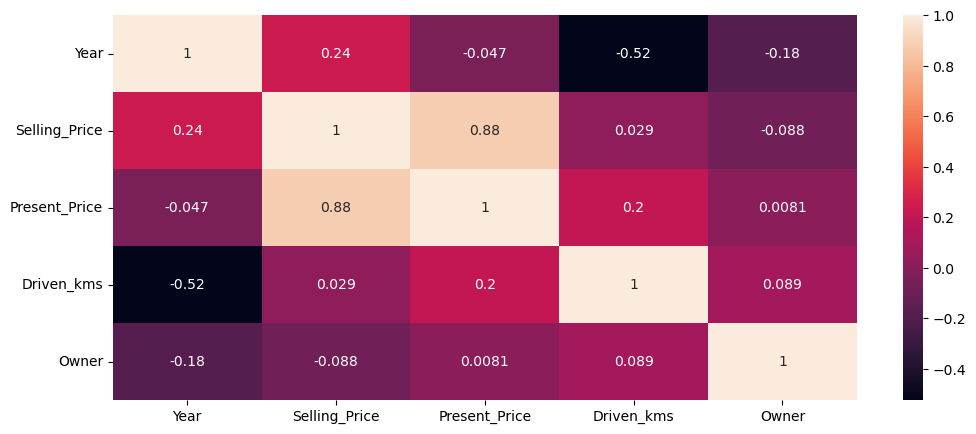

In [44]:
plt.figure(figsize = (12,5))
sns.heatmap(df.corr(),annot = True)